In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [3]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df = exercise.merge(calories,on='User_ID')

In [6]:
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


# Univariate Analysis

<Axes: xlabel='Gender', ylabel='Calories'>

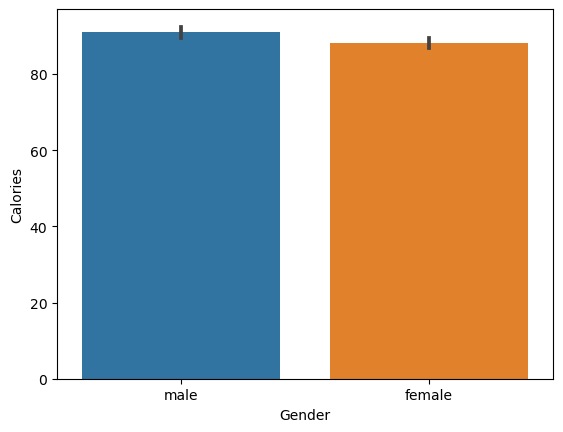

In [7]:
sns.barplot(x='Gender', y='Calories', data=df)


In [8]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

(array([2770., 2281., 1864., 1606., 1375., 1264., 1100., 1016.,  916.,
         808.]),
 array([20. , 25.9, 31.8, 37.7, 43.6, 49.5, 55.4, 61.3, 67.2, 73.1, 79. ]),
 <BarContainer object of 10 artists>)

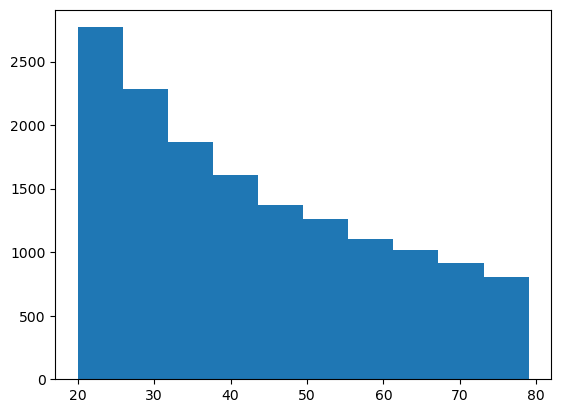

In [9]:
plt.hist(df['Age'])

# Scatterplot 


<Axes: xlabel='Duration', ylabel='Calories'>

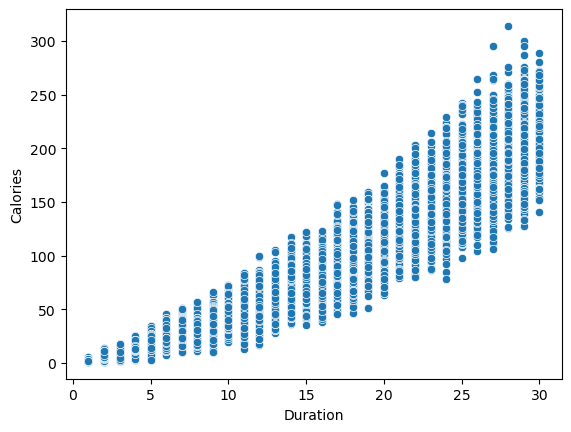

In [10]:
sns.scatterplot(x=df['Duration'],y=df['Calories'])

# Barplot

<Axes: xlabel='Gender', ylabel='Calories'>

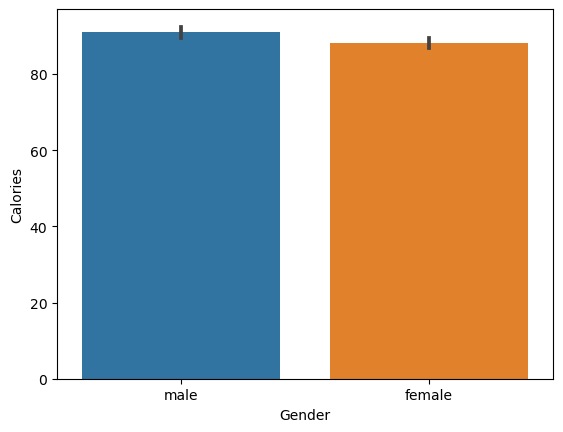

In [11]:
sns.barplot(x=df['Gender'],y=df['Calories'])

<Axes: xlabel='Age', ylabel='Calories'>

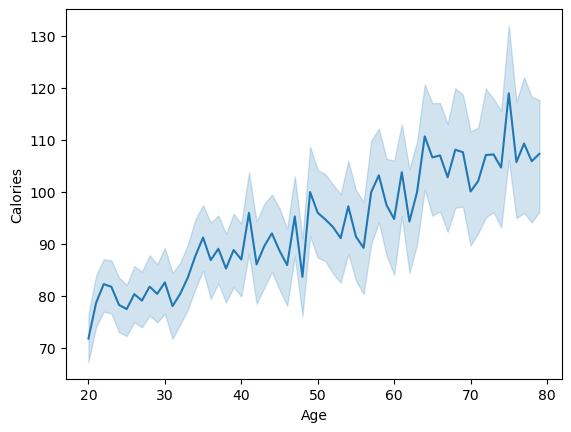

In [12]:
sns.lineplot(x=df['Age'],y= df['Calories'])


# Encoding

In [13]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Train and Test

In [14]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{name}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

lr  MSE: 131.99574575081692, Score: 0.9672937151257295
rd  MSE: 131.99625903139352, Score: 0.9672935879435944
ls  MSE: 143.82689461175065, Score: 0.9643621590908397
dtr  MSE: 27.913333333333334, Score: 0.9930835541206462
rfr  MSE: 7.295484933333333, Score: 0.9981923037960936


In [17]:
import pickle

pickle.dump(rfr, open('rfr.pkl', 'wb'))
X_train.to_csv('X_train.csv')

In [18]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle

# laod model
rfr = pickle.load(open('rfr.pkl','rb'))
x_train = pd.read_csv('X_train.csv')

def pred(Gender,Age,Height,Weight,Duration,Heart_rate,Body_temp):
    features = np.array([[Gender,Age,Height,Weight,Duration,Heart_rate,Body_temp]])
    prediction = rfr.predict(features).reshape(1,-1)
    return prediction[0]


# web app
# Gender Age Height Weight Duration Heart_Rate Body_Temp
st.title("Calories Burn Prediction")

Gender = st.selectbox('Gender', x_train['Gender'])
Age = st.selectbox('Age', x_train['Age'])
Height = st.selectbox('Height', x_train['Height'])
Weight = st.selectbox('Weight', x_train['Weight'])
Duration = st.selectbox('Duration (minutes)', x_train['Duration'])
Heart_rate = st.selectbox('Heart Rate (bpm)', x_train['Heart_Rate'])
Body_temp = st.selectbox('Body Temperature', x_train['Body_Temp'])

result = pred(Gender,Age,Height,Weight,Duration,Heart_rate,Body_temp)

if st.button('predict'):
    if result:
        st.write("You have consumed this calories :",result)

2024-07-09 17:54:26.062 
  command:

    streamlit run C:\Program Data\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-09 17:54:26.080 Session state does not function when running a script without `streamlit run`
C:\Program Data\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
